<div style="background-color: #007bff; color: #ffffff; border-radius: 10px; padding: 20px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
    <h1 style="text-align: center; margin: 0; font-size: 32px;">Salary Prediction and Analysis</h1>
</div>


<div style="background-color: #ffffff; color: #000000; border-radius: 8px; padding: 20px; box-shadow: 0 4px 8px rgba(0,0,0,0.1); margin-top: 20px;">
    <h2 style="color: #007bff; font-size: 22px; margin-bottom: 10px; text-align: left;">Project Goal</h2>
    <p style="font-size: 16px; text-align: justify;">The primary goal of this project is to build a linear regression model to predict the salary of individuals based on their demographic and professional information. This project includes data preprocessing, exploratory data analysis (EDA), model building, and evaluation.</p>
</div>


<div style="background-color: #ffffff; border: 1px solid #dae0e5; border-radius: 5px; padding: 15px;">
    <h2 style="color: #007bff;">Work Overview</h2>
    <ul>
        <li>Data Loading</li>
        <li>Data Exploration</li>
        <li>Data Analysis</li>
        <li>Data Cleaning</li>
        <li>Feature Selection</li>
        <li>Model Building and Evaluation</li>
    </ul>
</div>


# Import Packages

In [90]:
import numpy as np 
import pandas as pd 
import missingno as msno
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading Dataset

In [91]:
data = pd.read_csv("salary.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Columns Description

The dataset used in this project contains the following columns:

- **Age**: The age of the individual (numeric).
- **Gender**: The gender of the individual (categorical: Male, Female).
- **Education Level**: The highest education level attained by the individual (categorical: Bachelor's, Master's, PhD).
- **Job Title**: The job title of the individual (categorical with various unique titles).
- **Years of Experience**: The number of years of professional experience the individual has (numeric).
- **Salary**: The annual salary of the individual (numeric, target variable).


# Data Exploration

In [92]:
data.shape

(375, 6)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


<div style="background-color: #fff3cd; border-left: 6px solid #ffc107; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #ffc107;">Important Note:</strong> There are missing values.
</div>
>


<Axes: >

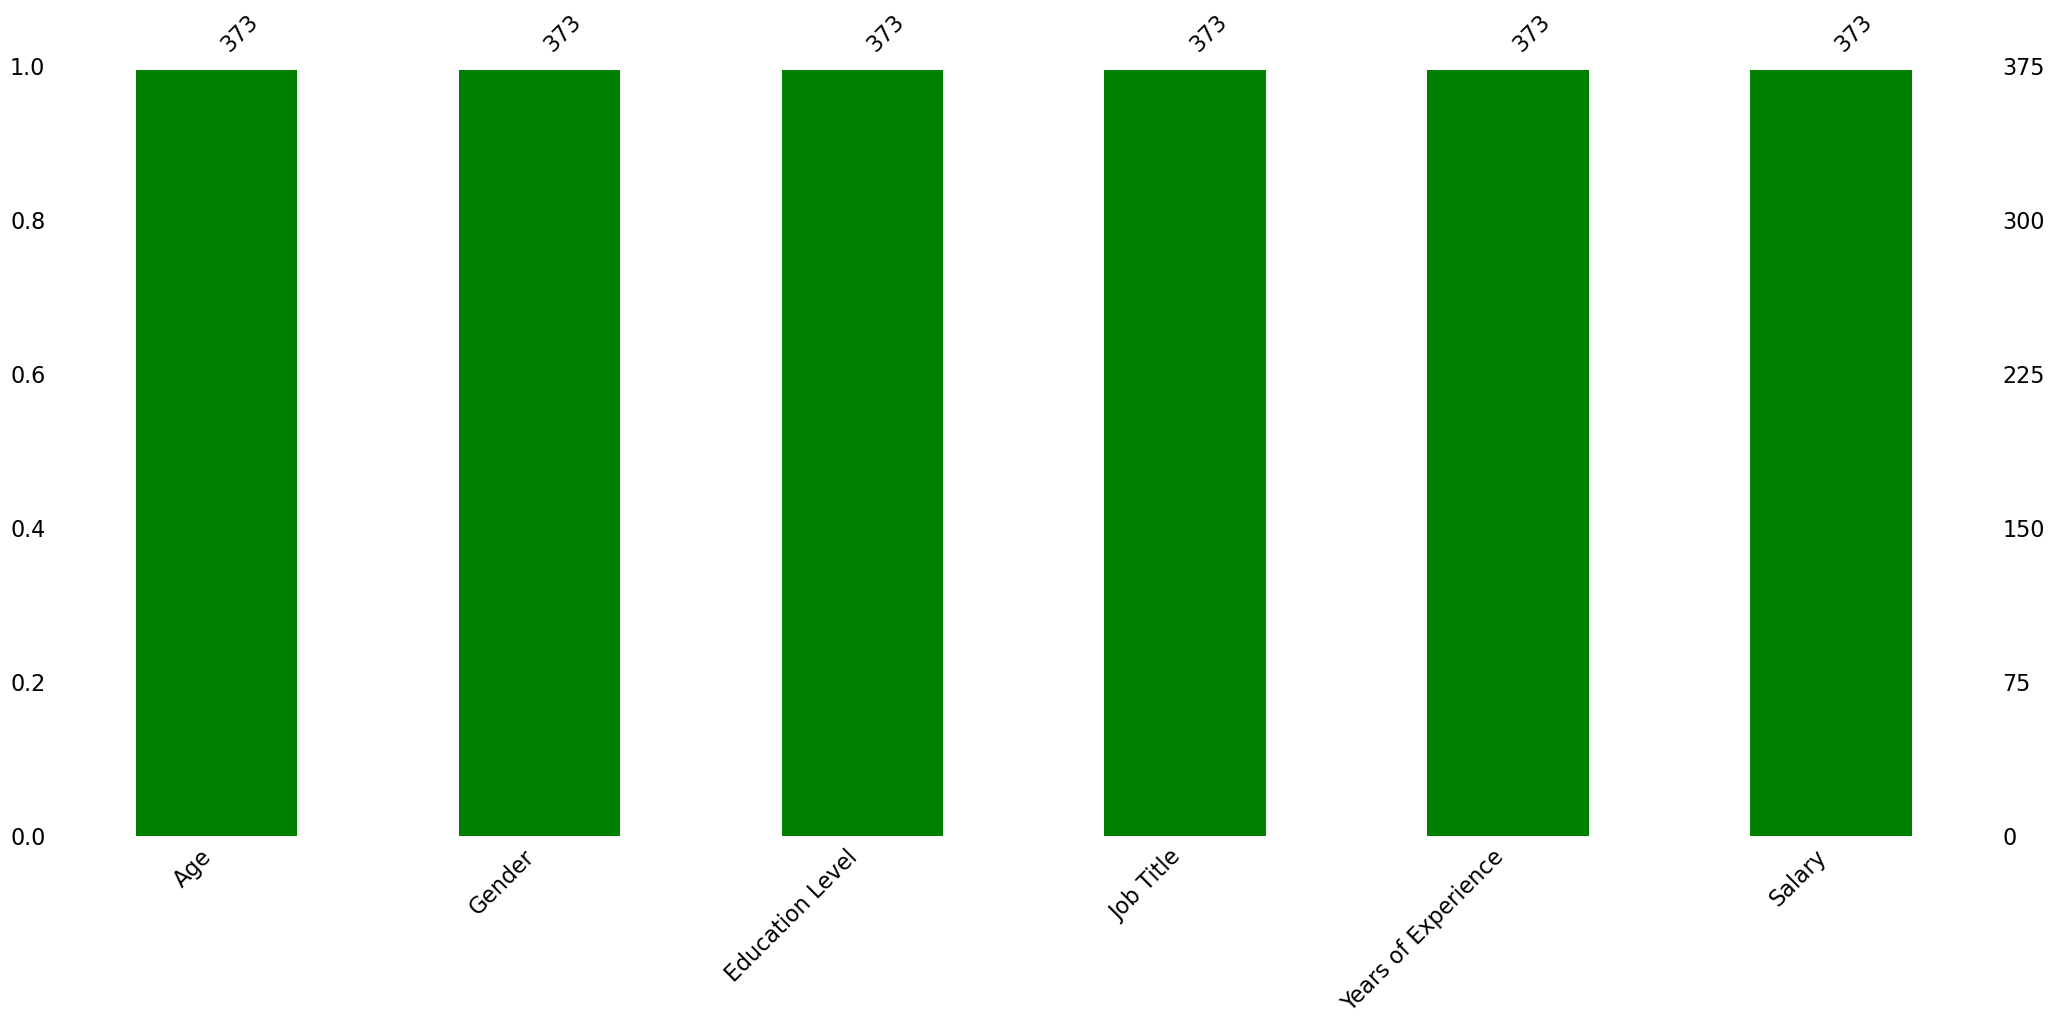

In [94]:
# Checking null values
msno.bar(data,color='g')

In [95]:
# Checking dublicated rows
data.duplicated().sum()

50

<div style="background-color: #fff3cd; border-left: 6px solid #ffc107; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #ffc107;">Important Note:</strong> There are dubicated rows.
</div>


# Data Analysis

In [96]:
# Statistical Measurements
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [97]:
# Function to visualize categorical columns
def categorical(category):
    cat = category.value_counts()
    fig = px.bar(
        x=cat.index, 
        y=cat.values,
        color=cat.index, 
        labels={"x": category.name, "y": "Counts"} 
    )
    
    fig.show()


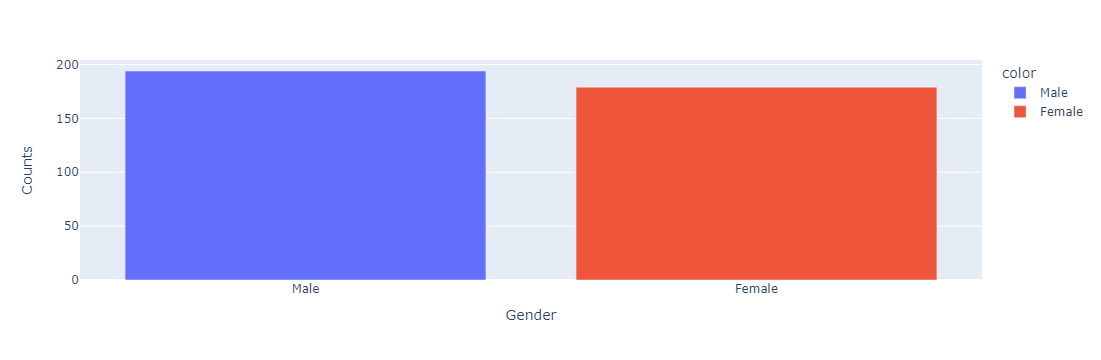

In [98]:
categorical(data["Gender"])

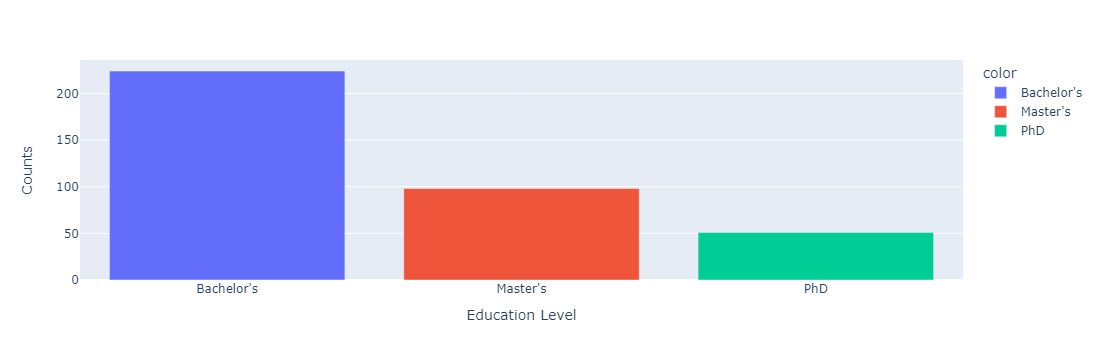

In [99]:
categorical(data["Education Level"])

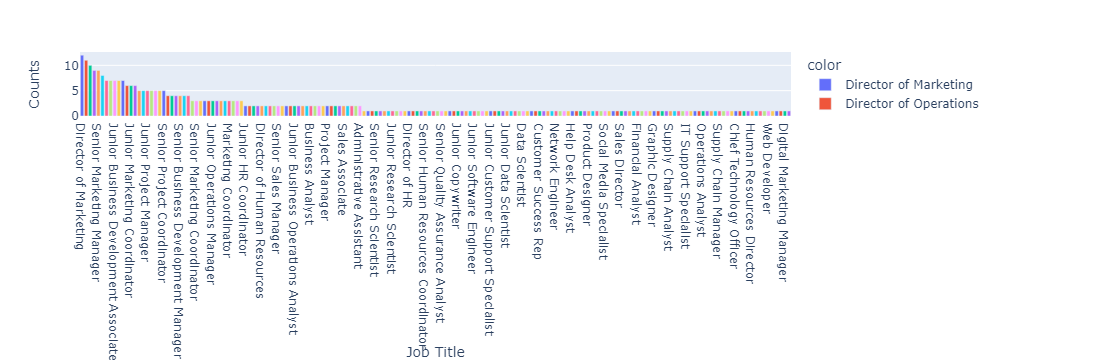

In [100]:
categorical(data["Job Title"])

In [101]:
# Function to show distribution of numerical data
def histogram ( data , x,title):
    fig = px.histogram(data , x )
    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'font': dict(
                size=24,
            )
        }
    )
    fig.show()

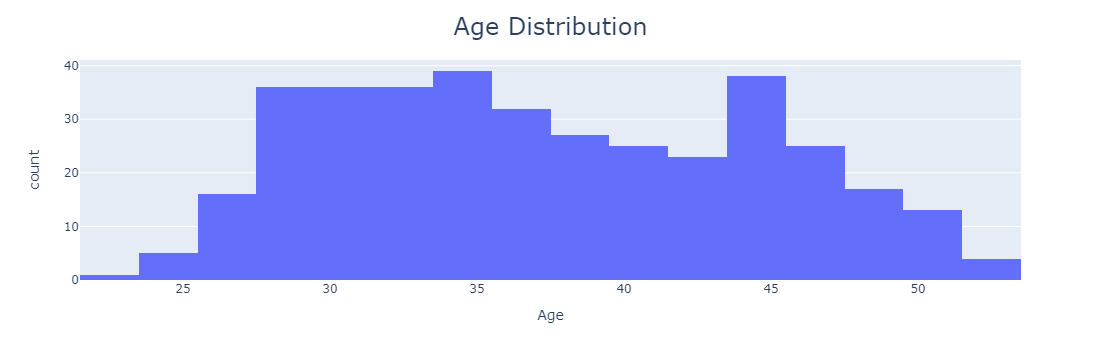

In [102]:
histogram(data , x = "Age", title="Age Distribution")

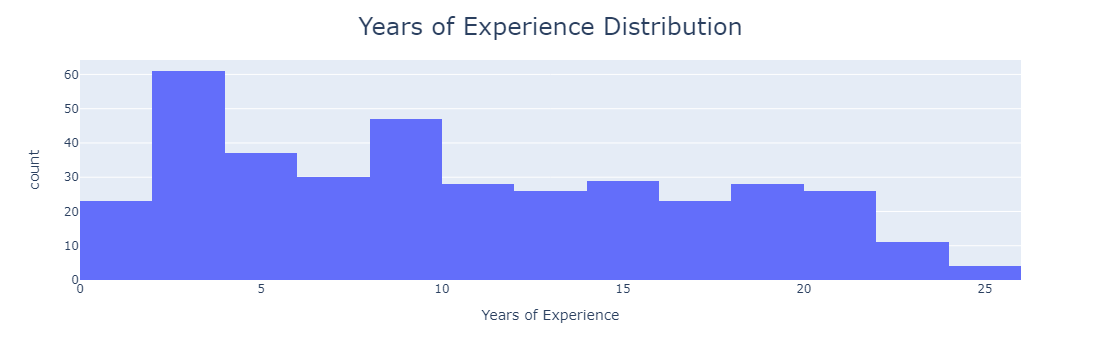

In [103]:
histogram(data , x = "Years of Experience" , title ="Years of Experience Distribution" )

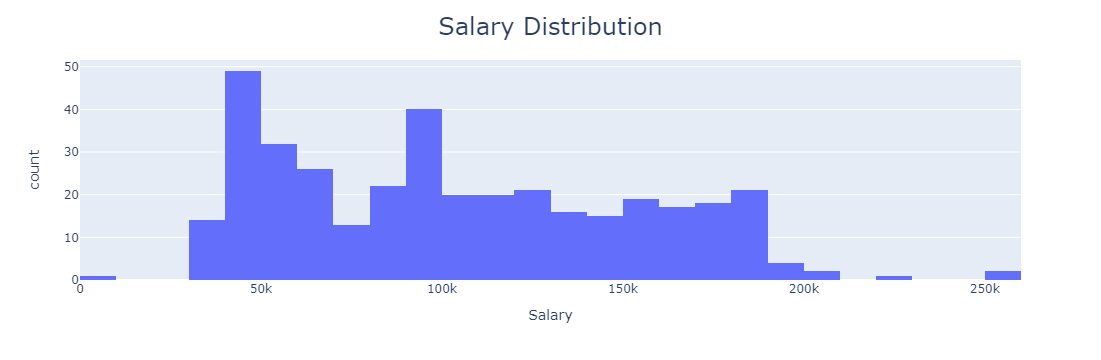

In [104]:
histogram(data , x = "Salary" , title ="Salary Distribution" )

In [105]:
# Function to draw boxplot
def draw_box_plots(data):

    numerical_cols = data.select_dtypes(include=['number']).columns
    
    for column in numerical_cols:
        fig = go.Figure()
        fig.add_trace(go.Box(y=data[column], name=column))
        fig.update_layout(title=f'Box Plot for {column}', yaxis=dict(title=column))
        fig.show()

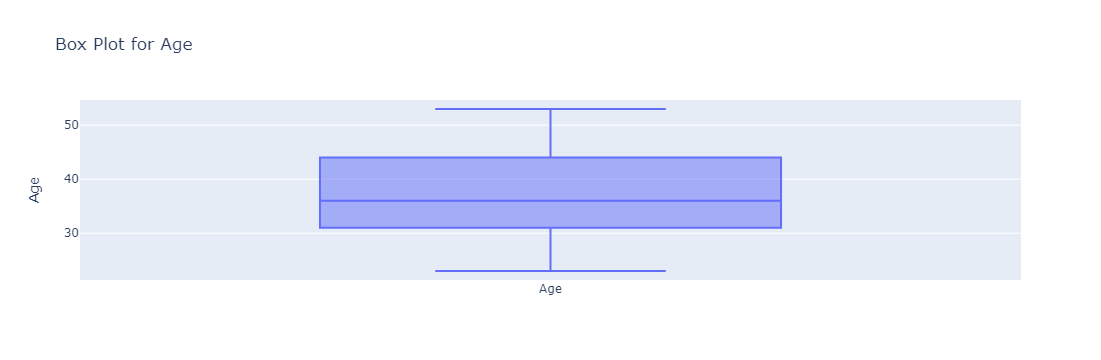

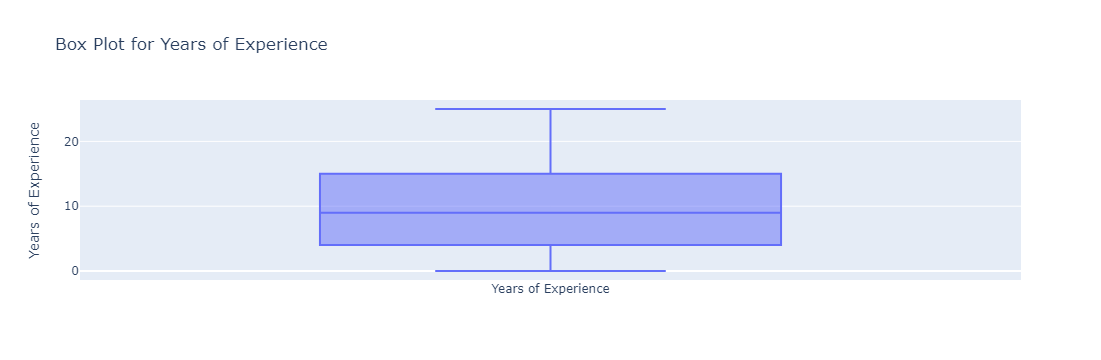

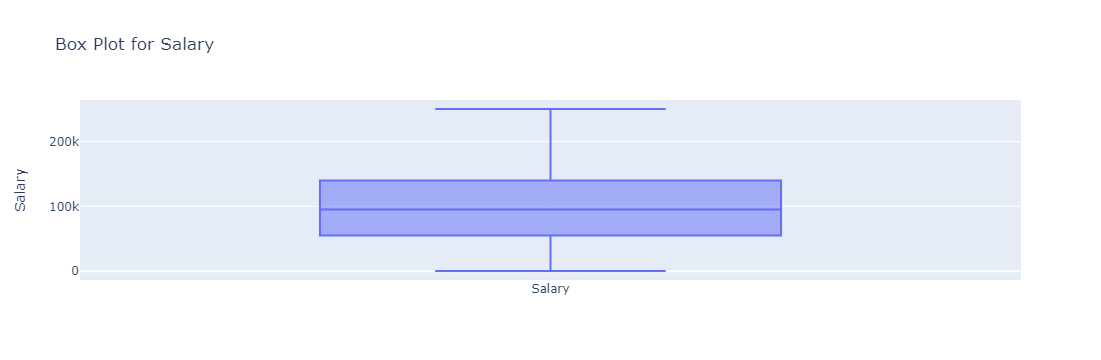

In [55]:
draw_box_plots(data)

<div style="background-color: #fff3cd; border-left: 6px solid #ffc107; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #ffc107;">Important Note:</strong> All attributes in the dataset have an impact on the output variable.
</div>
>
>
>


C:\Users\Mohamed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Mohamed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Mohamed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



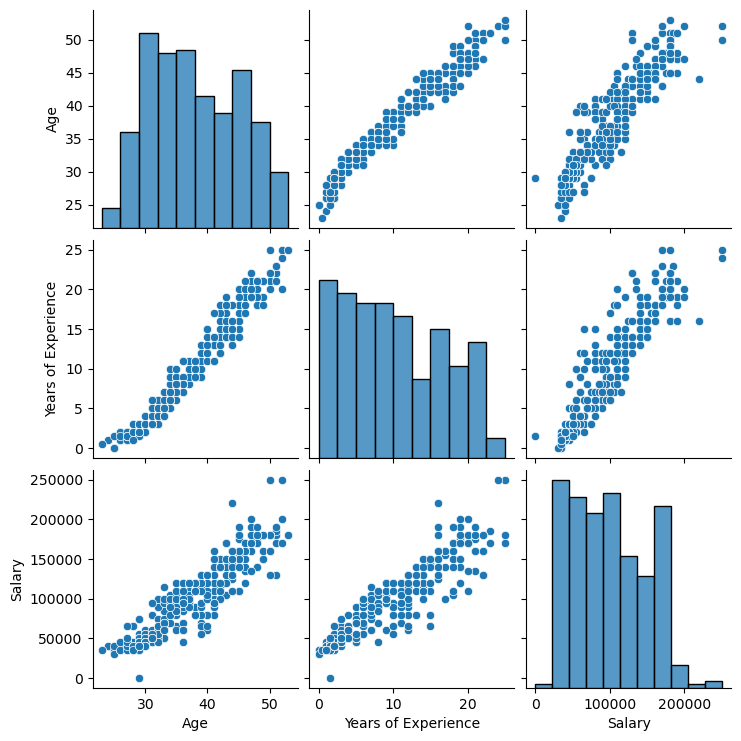

In [56]:
sns.pairplot(data)

# Data Cleaning 

Removing null values

In [57]:
data = data.dropna()

In [58]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Remove Duplicated Values

In [59]:
data = data.drop_duplicates()

In [60]:
data.duplicated().sum()

0

Encoding Categorical Columns

In [61]:
def label_encode_categorical_columns(df):

    le = LabelEncoder()
    
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    
    return df

In [62]:
data = label_encode_categorical_columns(data)

In [63]:
data.sample(4)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
163,35.0,1,0,132,7.0,80000.0
177,31.0,1,0,47,4.0,50000.0
144,25.0,0,1,65,1.5,40000.0
116,40.0,0,0,86,15.0,65000.0


# Feature Selection

In [65]:
correlation_matrix = data.corr()
correlation_matrix

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,-0.025034,0.540383,0.118619,0.979192,0.916543
Gender,-0.025034,1.000000,-0.024470,0.039072,-0.001367,0.075420
Education Level,0.540383,-0.024470,1.000000,0.113519,0.573912,0.661900
Job Title,0.118619,0.039072,0.113519,1.000000,0.105513,0.135939
Years of Experience,0.979192,-0.001367,0.573912,0.105513,1.000000,0.924455
Salary,0.916543,0.075420,0.661900,0.135939,0.924455,1.000000


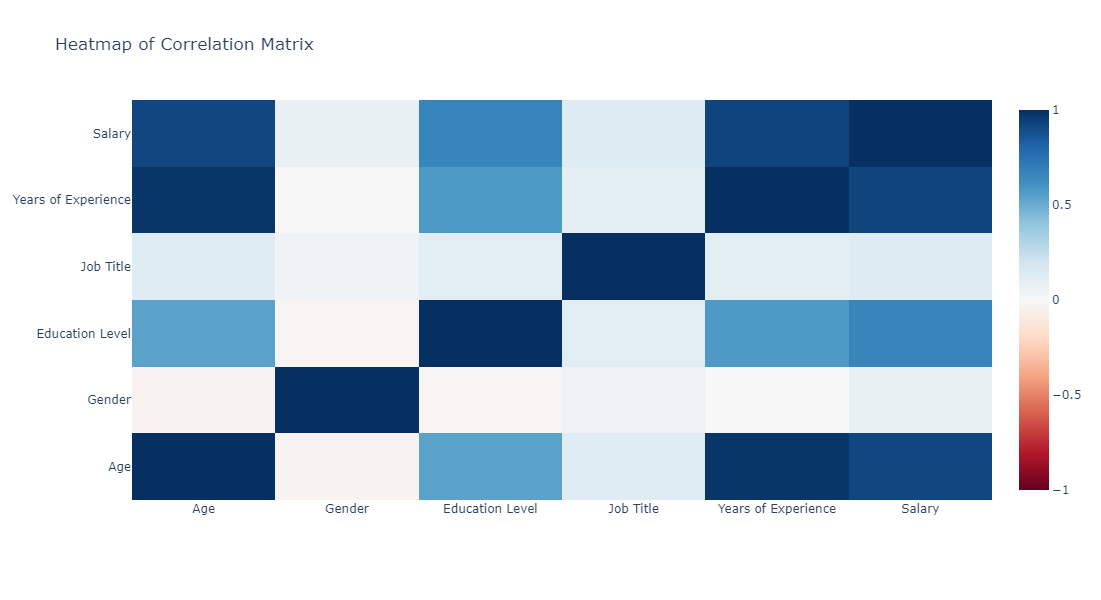

In [66]:
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1
))

fig.update_layout(
    title='Heatmap of Correlation Matrix',
    xaxis_nticks=36,
    width=600,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.show()


<div style="background-color: #f0f0f0; border-left: 6px solid #007bff; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #007bff;">Important Note:</strong> All attributes in the dataset have an impact on the output variable.
</div>


In [67]:
x = data.drop('Salary', axis=1)
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,159,5.0
1,28.0,0,1,17,3.0
2,45.0,1,2,130,15.0
3,36.0,0,0,101,7.0
4,52.0,1,1,22,20.0
...,...,...,...,...,...
348,28.0,0,0,68,1.0
349,36.0,1,0,111,8.0
350,44.0,0,2,115,16.0
351,31.0,1,0,63,3.0


In [68]:
y = data['Salary']
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [70]:
print(f'The shape of X train{x_train.shape}')
print(f'The shape of Y train{y_train.shape}')
print(f'The shape of X test{x_test.shape}')
print(f'The shape of Y test{y_test.shape}')

The shape of X train(226, 5)
The shape of Y train(226,)
The shape of X test(98, 5)
The shape of Y test(98,)


# Model Training and Evaluation

In [71]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
y_pred_train = model.predict(x_train)

In [73]:
# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

In [74]:
print(f'Training Set Evaluation Metrics:')
print(f'MAE: {mae_train}')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'R-squared: {r2_train}')

Training Set Evaluation Metrics:
MAE: 11785.235161449373
MSE: 235151524.9034787
RMSE: 15334.65111776198
R-squared: 0.9002129670894105


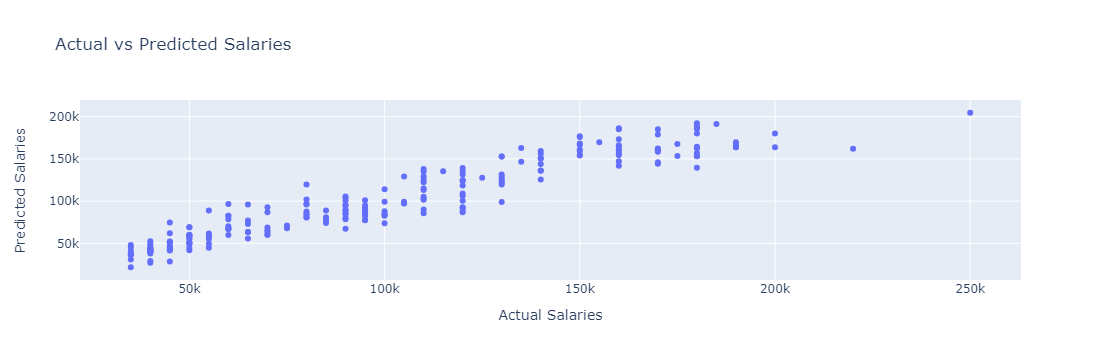

In [77]:
fig = px.scatter(x=y_train, y=y_pred_train, labels={'x': 'Actual Salaries', 'y': 'Predicted Salaries'}, title='Actual vs Predicted Salaries')
fig.show()

In [79]:
y_pred_test = model.predict(x_test)

In [80]:
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

In [81]:
print(f'\nTesting Set Evaluation Metrics:')
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'R-squared: {r2_test}')


Testing Set Evaluation Metrics:
MAE: 11958.516155084977
MSE: 296950420.595901
RMSE: 17232.249435169542
R-squared: 0.87271653210031


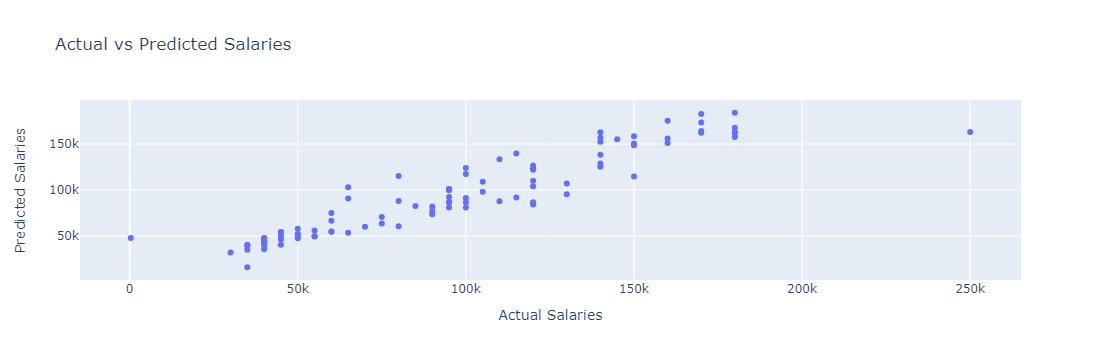

In [82]:
fig = px.scatter(x=y_test, y=y_pred_test, labels={'x': 'Actual Salaries', 'y': 'Predicted Salaries'}, title='Actual vs Predicted Salaries')
fig.show()